# Summary

<p>
This project is doing explorative data analysis using the pyspark and sql application programming interfaces (API's) of Apache spark.
</p> 

<p>
Apache Spark is an open-source engine developed specifically for handling large-scale data processing and analytics. Spark offers the ability to access data in a variety of sources. Apache Spark is designed to accelerate analytics on Hadoop with speed and efficiency.
</p> 
<a href="https://www.webopedia.com/TERM/A/apache-spark.html" target="_blank">webopedia</a> 

<p>
The airtraffic system data records consist of the tables flights, planes,
and airports. The data sources used  are csv-files stored locally. 
The functions and methods applied here include SQL-queries and
SQL-calculations and pyspark implementations like select, filter,
collect, join, and aggregate. Those can of course applied to Big Data on remote machines. This is the whole point of the Apache Spark system architecture. It allows even analysing streaming data in real time.
</p> 



<img src="spark_architecture.jpg" alt="Smiley face" align="left"  style="margin-left: 0px; margin-right: 0px; margin-top: 20px; margin-bottom: 20px; float: left; width: 800px; height: 300px"> 


## Import packages

In [313]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.rdd import RDD
from pyspark.sql.functions import mean, stddev , col, avg, round
from pyspark.sql.types import IntegerType, FloatType
import pyspark.sql.functions as F
from pyspark.sql.functions import isnan

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


### Inspect working directory

In [314]:
cwd_1=os.getcwd()
# print(cwd_1)
os.chdir(r'C:\Users\gamarandor\spark\spark-3.0.0-preview-bin-hadoop2.7\projects')
cwd_2=os.getcwd()
# print(cwd_2)

C:\Users\gamarandor\spark\spark-3.0.0-preview-bin-hadoop2.7\projects
C:\Users\gamarandor\spark\spark-3.0.0-preview-bin-hadoop2.7\projects


## Initializing Spark

<p>
"A SparkSession is beyond a time-bounded interaction, SparkSession provides a single point of entry to interact with underlying Spark functionality and allows programming Spark with DataFrame and Dataset APIs. Most importantly, it curbs the number of concepts and constructs a developer has to juggle while interacting with Spark."
</p> 
<a href="https://databricks.com/blog/2016/08/15/how-to-use-sparksession-in-apache-spark-2-0.html" target="_blank">Class SparkSession</a> 

<p>
"A SparkContext represents the connection to a Spark cluster, 
and can be used to create RDDs, accumulators and broadcast variables 
on that cluster." The SparkContext is the entry point into the cluster. Without creating a SparkContext nothing in the Spark session will work.
</p> 
<a href="https://spark.apache.org/docs/2.0.2/api/java/org/apache/spark/SparkContext.html" target="_blank">Class SparkContext</a> 








In [315]:

# Create my_spark
my_spark = SparkSession.builder.getOrCreate()
print(my_spark)

In [316]:
## Create Spark context 
sqlContext = SQLContext (sc)
print(sqlContext)


## Inspect spark context

In [317]:
# Verify SparkContext
print(sc)

# Print Spark version
print(sc.version)

# Master URL to connect to
print(sc.master)

# Path where Spark is installed on worker nodes
print(str(sc.sparkHome))

# Retrieve name of the Spark User running
print(str(sc.sparkUser()))

# Return application name
print(sc.appName)

# Retrieve application ID
print(sc.applicationId)

# Return default level of parallelism 
print(sc.defaultParallelism)

# Default minimum number of partitions for RDDs
print(sc.defaultMinPartitions)

<SparkContext master=local[*] appName=PySparkShell>
3.0.0-preview
local[*]
None
gamarandor
PySparkShell
local-1577709017262
4
2


## Reading csv-files into the Spark cluster

In [318]:
path_source = r"planes.csv"

df_planes = sqlContext.read.load (path_source,
                           format='com.databricks.spark.csv',
                           header='true',
                           inferSchema='true')
                           
print(df_planes)

DataFrame[tailnum: string, year: string, type: string, manufacturer: string, model: string, engines: int, seats: int, speed: string, engine: string]


In [319]:
temp_table_name = "planes_csv"
print(temp_table_name)

planes_csv


In [320]:
df_planes.createOrReplaceTempView(temp_table_name)

In [321]:
src_flights = r"flights_small.csv"

df_flights = sqlContext.read.load (src_flights,
                           format='com.databricks.spark.csv',
                           header='true',
                           inferSchema='true')

In [322]:
# schema delivers the data types of the variables or columns
print(df_flights.schema)

print("")
temp_table_name_2 = "df_flights"
print(temp_table_name_2)
df_flights.createOrReplaceTempView(temp_table_name_2)

StructType(List(StructField(year,IntegerType,true),StructField(month,IntegerType,true),StructField(day,IntegerType,true),StructField(dep_time,StringType,true),StructField(dep_delay,StringType,true),StructField(arr_time,StringType,true),StructField(arr_delay,StringType,true),StructField(carrier,StringType,true),StructField(tailnum,StringType,true),StructField(flight,IntegerType,true),StructField(origin,StringType,true),StructField(dest,StringType,true),StructField(air_time,StringType,true),StructField(distance,IntegerType,true),StructField(hour,StringType,true),StructField(minute,StringType,true)))

df_flights


In [323]:
src_airports =  r"airports.csv"

df_airports = sqlContext.read.load (src_airports,
                           format='com.databricks.spark.csv',
                           header='true',
                           inferSchema='true')
df_airports.schema

StructType(List(StructField(faa,StringType,true),StructField(name,StringType,true),StructField(lat,DoubleType,true),StructField(lon,DoubleType,true),StructField(alt,IntegerType,true),StructField(tz,IntegerType,true),StructField(dst,StringType,true)))

In [324]:
temp_table_name_3 = "df_airports"
print(temp_table_name_3)
df_airports.createOrReplaceTempView(temp_table_name_3)

df_airports


#### Check if object is a data frame or RDD

In [325]:
def check_df(x):
    if isinstance(x, RDD):
        return "RDD"
    if isinstance(x, DataFrame):
        return "DataFrame"
    
check_df(df_airports)

'DataFrame'

### SparkSession.catalog.listTables()
<p>
The attribute catalog of the active Spark session lists the data 
inside the cluster. The .listTables() method generates
all the tables inside the cluster as a list. 
This helps to get orientation.
</p>

In [326]:
print(my_spark.catalog.listTables())

[Table(name='airports2_tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='df_airports', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='df_flights', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='flights2_tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='planes2tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='planes_csv', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp_df_198', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


# Explorative data analysis

to determine the current status of the airtraffic system.

### Using Pyspark SQL

<p>
for explorative data analysis by applying optimized data queries to Spark session objects. In this case the object are SQL tables made available to sqlContext above.
</p> 


#### Table: airports

In [327]:
# Select all from aiports but limit the view to 6 records of the table.

query_1 = "FROM df_airports SELECT *"

airports6 = spark.sql(query_1)

airports6.show(6)

airports6_pd = airports6.toPandas()
airports6_pd['dst'].value_counts()

+---+--------------------+----------+-----------+----+---+---+
|faa|                name|       lat|        lon| alt| tz|dst|
+---+--------------------+----------+-----------+----+---+---+
|04G|   Lansdowne Airport|41.1304722|-80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|32.4605722|-85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|41.9893408|-88.1012428| 801| -6|  A|
|06N|     Randall Airport| 41.431912|-74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|31.0744722|-81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|36.3712222|-82.1734167|1593| -4|  A|
+---+--------------------+----------+-----------+----+---+---+
only showing top 6 rows



A    1329
U      45
N      23
Name: dst, dtype: int64

#### Little dashboard

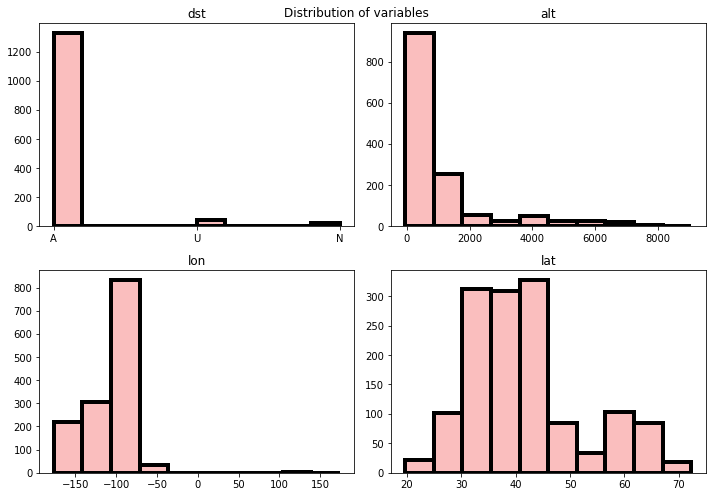

In [328]:
fig, axs = plt.subplots(2,2, tight_layout=True, figsize=(10,7))
plt.suptitle('Distribution of variables')


axs[0,0].hist(x=airports6_pd['dst'], edgecolor='black', 
                  linewidth=4,  color='#fabebe')
axs[0,0].set_title('dst')
axs[0,1].hist(x=airports6_pd['alt'], edgecolor='black', 
              linewidth=4, color='#fabebe')
axs[0,1].set_title('alt')
axs[1,0].hist(x=airports6_pd['lon'], edgecolor='black', 
              linewidth=4, color='#fabebe')
axs[1,0].set_title('lon')
axs[1,1].hist(x=airports6_pd['lat'], edgecolor='black', 
              linewidth=4, color='#fabebe')
axs[1,1].set_title('lat')


plt.show()

In [329]:
query_3 = "FROM df_airports SELECT DISTINCT name"

aiports_unique = spark.sql(query_3)

aiports_unique.show()

+--------------------+
|                name|
+--------------------+
| Igor I Sikorsky Mem|
|Burlington-Alaman...|
|        Laughlin Afb|
|           Sussex Co|
|   Lansing Municipal|
|Delaware County A...|
|     Rampart Airport|
|   Lansdowne Airport|
|Borrego Valley Ai...|
|      Egegik Airport|
|      Craven Co Rgnl|
|      Jonesboro Muni|
|      Ramona Airport|
| Scammon Bay Airport|
|           Moody Afb|
|                KBWD|
|Lost Nation Munic...|
|           Davis Fld|
|         Mobile Rgnl|
|       Idlewild Intl|
+--------------------+
only showing top 20 rows



In [330]:
# Select all airports with timezone -5 and destination A

query_3 = "FROM df_airports SELECT *  WHERE tz = -5 AND dst = 'A' LIMIT 6"

airports_tz = spark.sql(query_3)

airports_tz.show()



+---+--------------------+----------+-----------+----+---+---+
|faa|                name|       lat|        lon| alt| tz|dst|
+---+--------------------+----------+-----------+----+---+---+
|04G|   Lansdowne Airport|41.1304722|-80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|32.4605722|-85.6800278| 264| -5|  A|
|06N|     Randall Airport| 41.431912|-74.3915611| 523| -5|  A|
|0G6|Williams County A...|41.4673056|-84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|42.8835647|-76.7812318| 492| -5|  A|
|0W3|Harford County Ai...|39.5668378|-76.2024028| 409| -5|  A|
+---+--------------------+----------+-----------+----+---+---+



   faa                           name        lat        lon   alt  tz dst
0  04G              Lansdowne Airport  41.130472 -80.619583  1044  -5   A
1  06A  Moton Field Municipal Airport  32.460572 -85.680028   264  -5   A
0    41.130472
1    32.460572
2    41.431912
3    41.467306
Name: lat, dtype: float64
0


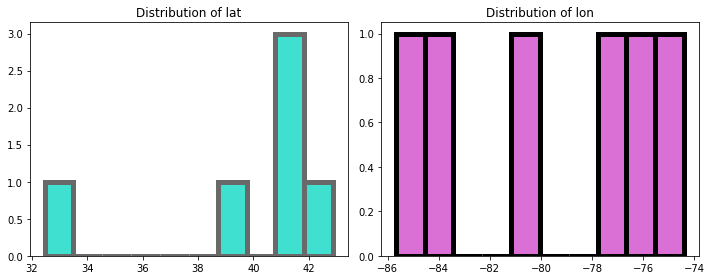

In [331]:
airports_tz_pd = airports_tz.toPandas()
print(airports_tz_pd .head(2))

print(airports_tz_pd.loc[:3,'lat'])
print(airports_tz_pd['lat'].isnull().sum())

fig, axs = plt.subplots(1,2, tight_layout=True, figsize=(10,4))


axs[0].hist(x=airports_tz_pd['lat'], color='turquoise', 
                           edgecolor='dimgray', linewidth=5)
axs[0].set_title('Distribution of lat')

axs[1].hist(x=airports_tz_pd['lon'], color='orchid', 
                           edgecolor='black', linewidth=5)
axs[1].set_title('Distribution of lon')

plt.show()

In [332]:
# Select all aiports, which name starts with A

query_4 = "FROM df_airports SELECT name WHERE name LIKE 'A%'"

airports_like = spark.sql(query_4)

airports_like.show()

+--------------------+
|                name|
+--------------------+
|  Atmautluak Airport|
|Ashland County Ai...|
|Apalachicola Regi...|
|        Abilene Rgnl|
|      Ambler Airport|
|Albuquerque Inter...|
|Aberdeen Regional...|
|              Arcata|
|  Atlantic City Intl|
|        Adak Airport|
|        Ardmore Muni|
|             Addison|
|         Andrews Afb|
|   Allakaket Airport|
|     Alexandria Intl|
|Allegheny County ...|
|Angoon Seaplane Base|
|Augusta Rgnl At B...|
|Athens Ben Epps A...|
|Alliance Municipa...|
+--------------------+
only showing top 20 rows



#### Table: flights

In [333]:
# Don't change this query
query_5 = "FROM df_flights SELECT * LIMIT 5"

# Get the first 10 rows of flights
flights5 = spark.sql(query_5)

# Show the results
flights5.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
+----+-----+---+--------+---------+-----

In [334]:
# Calculate total airtime of all flights

query_6 = "FROM df_flights SELECT SUM(air_time)"

flights_sum_airt = spark.sql(query_6)

flights_sum_airt.show()

+-----------------------------+
|sum(CAST(air_time AS DOUBLE))|
+-----------------------------+
|                    1517376.0|
+-----------------------------+



In [335]:
query_8 = "FROM df_flights SELECT DISTINCT carrier"

carrier_unique = spark.sql(query_8)

carrier_unique.show()

+-------+
|carrier|
+-------+
|     UA|
|     AA|
|     B6|
|     DL|
|     OO|
|     F9|
|     US|
|     HA|
|     AS|
|     VX|
|     WN|
+-------+



In [336]:
query_8b = "FROM df_flights SELECT COUNT(DISTINCT carrier)"

carrier_unique = spark.sql(query_8b)

carrier_unique.show()

+-----------------------+
|count(DISTINCT carrier)|
+-----------------------+
|                     11|
+-----------------------+



In [337]:
# KPI Average airtime by carrier ordered by average airtime

query_7 = "FROM df_flights SELECT carrier, ROUND(AVG(air_time)) as mean_airtime GROUP BY carrier ORDER BY mean_airtime "

carrier_airtime = spark.sql(query_7)

carrier_airtime.show()

+-------+------------+
|carrier|mean_airtime|
+-------+------------+
|     OO|        87.0|
|     VX|       107.0|
|     WN|       119.0|
|     F9|       128.0|
|     AS|       158.0|
|     UA|       177.0|
|     US|       184.0|
|     DL|       185.0|
|     B6|       197.0|
|     AA|       205.0|
|     HA|       334.0|
+-------+------------+



In [338]:
# KPI delay by carrier 
query_9 = "FROM df_flights SELECT carrier , ROUND(AVG(dep_delay)) as departure_delay GROUP By carrier Having departure_delay > 3 ORDER BY departure_delay DESC" 

delay= spark.sql(query_9)

delay.show()

+-------+---------------+
|carrier|departure_delay|
+-------+---------------+
|     WN|           12.0|
|     AA|           11.0|
|     UA|           10.0|
|     VX|            7.0|
|     B6|            7.0|
|     DL|            6.0|
|     F9|            6.0|
+-------+---------------+



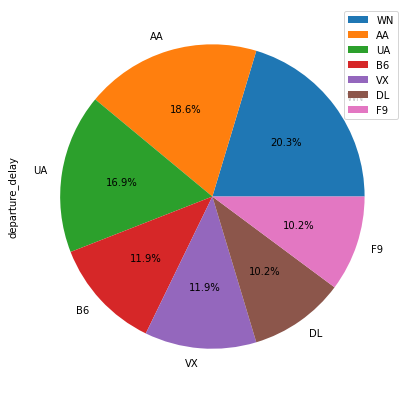

In [339]:
delay_pd = delay.toPandas()

delay_pd.plot.pie(y='departure_delay', legend=True, figsize=(13,7),
                  labels=delay_pd['carrier'], autopct='%1.1f%%')
plt.show()

#### Table: planes

In [340]:
query_10 = "From planes_csv SELECT * LIMIT 5"

planes = spark.sql(query_10)

planes.show()

+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N104UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N105UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N107US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+



In [341]:
query_10 = "FROM planes_csv SELECT DISTINCT manufacturer ORDER BY manufacturer"

manufact = spark.sql(query_10)

manufact.show()

+--------------------+
|        manufacturer|
+--------------------+
|              AIRBUS|
|    AIRBUS INDUSTRIE|
|       BARKER JACK L|
|                BELL|
|              BOEING|
|      BOMBARDIER INC|
|            CANADAIR|
|              CESSNA|
|  CIRRUS DESIGN CORP|
|             EMBRAER|
|GULFSTREAM AEROSPACE|
|        KILDALL GARY|
|     LAMBERT RICHARD|
|          MARZ BARRY|
|   MCDONNELL DOUGLAS|
|MCDONNELL DOUGLAS...|
|               PIPER|
|ROBINSON HELICOPT...|
|            SIKORSKY|
+--------------------+



In [342]:
# I am interested in the to 10 manufacturer

query_11 = "FROM planes_csv SELECT manufacturer, \
            COUNT(manufacturer)as planes GROUP BY manufacturer \
            ORDER BY  planes DESC LIMIT 10"

manufacturer_top = spark.sql(query_11)

manufacturer_top.show()

+--------------------+------+
|        manufacturer|planes|
+--------------------+------+
|              BOEING|  1460|
|    AIRBUS INDUSTRIE|   401|
|              AIRBUS|   397|
|      BOMBARDIER INC|   214|
|   MCDONNELL DOUGLAS|    94|
|             EMBRAER|    37|
|            CANADAIR|     8|
|              CESSNA|     4|
|               PIPER|     2|
|MCDONNELL DOUGLAS...|     2|
+--------------------+------+



In [343]:
# I am interested in the models produced by Airbus

query_11 = "FROM planes_csv SELECT DISTINCT model \
            WHERE manufacturer LIKE 'AIRBUS%'"

models = spark.sql(query_11)

models.show()

+--------+
|   model|
+--------+
|A321-231|
|A320-211|
|A320-232|
|A319-112|
|A330-223|
|A320-214|
|A319-115|
|A320-231|
|A319-114|
|A319-111|
|A320-212|
|A319-131|
|A321-211|
|A319-132|
|A330-323|
|A330-243|
+--------+



In [344]:
# What are the types of planes?

query_13 = "FROM planes_csv SELECT DISTINCT(type)"

models = spark.sql(query_13)

models.show()

+--------------------+
|                type|
+--------------------+
|          Rotorcraft|
|Fixed wing multi ...|
|Fixed wing single...|
+--------------------+



In [345]:
# How many types were used in which year

query_13 = "FROM planes_csv SELECT year, \
            COUNT(DISTINCT type) as plane_type \
            GROUP BY year ORDER BY year"

type = spark.sql(query_13)

type.show()

+----+----------+
|year|plane_type|
+----+----------+
|   0|         1|
|1959|         1|
|1963|         1|
|1968|         1|
|1975|         2|
|1976|         1|
|1980|         1|
|1984|         1|
|1985|         3|
|1986|         1|
|1987|         1|
|1988|         1|
|1989|         1|
|1990|         1|
|1991|         1|
|1992|         1|
|1993|         2|
|1994|         1|
|1995|         1|
|1996|         1|
+----+----------+
only showing top 20 rows



#### Null & NA-values

In [346]:
query_144 = "From planes_csv SELECT speed LIMIT 10"

planes = spark.sql(query_144)

planes.show()

+-----+
|speed|
+-----+
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
+-----+



In [347]:
query_145 = "From planes_csv SELECT speed WHERE speed IS NULL LIMIT 10"

planes = spark.sql(query_145)

planes.show()

+-----+
|speed|
+-----+
+-----+



In [348]:
query_145 = "From planes_csv SELECT speed WHERE speed IS NULL LIMIT 10"

planes = spark.sql(query_145)

planes.show()

+-----+
|speed|
+-----+
+-----+



In [349]:
query_146 = "From planes_csv SELECT speed WHERE speed NOT LIKE 'NA' LIMIT 5"

planes = spark.sql(query_146)

planes.show()

# Only five values are not NA

+-----+
|speed|
+-----+
|   90|
|   90|
|  107|
|  112|
|  126|
+-----+



### Read in csc files with read.csv as data frames

In [350]:
planes2 = spark.read.csv("planes.csv", inferSchema=True, header=True)
print(planes2.schema)
print(isinstance(planes2, DataFrame ))

print("") 

flights2 = \
spark.read.csv("flights_small.csv", inferSchema=True, header=True)

airports2 = spark.read.csv("airports.csv", inferSchema=True, header=True)


StructType(List(StructField(tailnum,StringType,true),StructField(year,StringType,true),StructField(type,StringType,true),StructField(manufacturer,StringType,true),StructField(model,StringType,true),StructField(engines,IntegerType,true),StructField(seats,IntegerType,true),StructField(speed,StringType,true),StructField(engine,StringType,true)))
True



### Investigating the data frames

In [351]:
# schema displays the column types
# it has shown that a lot of numeric variables were stored as strings
# this needed to be corrected

print(flights2.columns)
print("")

# convert air_time from string to integer
# with column creates a new column air_time of type integer
flights2 = \
flights2.withColumn("air_time", flights2["air_time"].cast(IntegerType()))

# converting multiple columns with a for loop

flights_cols = \
['dep_time', 'dep_delay', 'arr_time', 'arr_delay',  'hour', 'minute']


for i in flights_cols:
    flights2 = flights2.withColumn(i, flights2[i].cast(IntegerType()))
    


# printSchema displays the column types neatly
print(flights2.printSchema())
print(isinstance(flights2, DataFrame ))

print("")



['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- dep_time: integer (nullable = true)
 |-- dep_delay: integer (nullable = true)
 |-- arr_time: integer (nullable = true)
 |-- arr_delay: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: integer (nullable = true)
 |-- distance: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- minute: integer (nullable = true)

None
True



In [352]:
print(planes2.schema)
print(isinstance(planes2, DataFrame ))

print("") 

print(airports2.printSchema())
print(isinstance(airports2, DataFrame ))

StructType(List(StructField(tailnum,StringType,true),StructField(year,StringType,true),StructField(type,StringType,true),StructField(manufacturer,StringType,true),StructField(model,StringType,true),StructField(engines,IntegerType,true),StructField(seats,IntegerType,true),StructField(speed,StringType,true),StructField(engine,StringType,true)))
True

root
 |-- faa: string (nullable = true)
 |-- name: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- alt: integer (nullable = true)
 |-- tz: integer (nullable = true)
 |-- dst: string (nullable = true)

None
True


In [353]:
# show displays the df

print(planes2.show(n=3))
print("")

print(flights2.show(n=3))
print("")

print(airports2.show(n=3))

+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N104UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
only showing top 3 rows

None

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+-

### Applying pyspark operations to Spark data frames

using methods like count, describe, filter. Spark methods and SQL-queries
can be applied in parallel. Spark method follow the pattern dataframe.object (like dataframe.column) as it is pandas for example.

In [354]:
# A spark method like filter allows to put in an SQL-expression
# or a spark boolean of True or False.
# In Pyspark often different methods are possible.

# SQL
flights1500_sql = flights2.filter("distance >1500").\
                  select('year', 'month', 'day', 'dep_time', \
                         'dep_delay', 'arr_time')

# Spark boolean
flights1500_spark = flights2.filter(flights2.distance > 1500).\
                    select('year', 'month', 'day', 'dep_time', \
                           'dep_delay', 'arr_time')

print(flights1500_sql.show(2))
print("")
print(flights1500_spark.show(2))

+----+-----+---+--------+---------+--------+
|year|month|day|dep_time|dep_delay|arr_time|
+----+-----+---+--------+---------+--------+
|2014|    1| 22|    1040|        5|    1505|
|2014|   11| 19|    1812|       -3|    2352|
+----+-----+---+--------+---------+--------+
only showing top 2 rows

None

+----+-----+---+--------+---------+--------+
|year|month|day|dep_time|dep_delay|arr_time|
+----+-----+---+--------+---------+--------+
|2014|    1| 22|    1040|        5|    1505|
|2014|   11| 19|    1812|       -3|    2352|
+----+-----+---+--------+---------+--------+
only showing top 2 rows

None


In [355]:
# columns shows only the column names similar to pandas
# number of columns with len as in core python

print(planes2.columns)
print("n-planes columns: ", len(planes2.columns))

print("")

print(flights2.columns)
print("n-flights columns: ", len(flights2.columns))

print("")

print(airports2.columns)
print("n-airports columns: ", len(airports2.columns))

['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine']
n-planes columns:  9

['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']
n-flights columns:  16

['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst']
n-airports columns:  7


In [356]:
# number of observations

print("rows planes: ", planes2.count())
print("rows flights:" , flights2.count())
print("rows airports:" , airports2.count())

rows planes:  2628
rows flights: 10000
rows airports: 1397


In [357]:
# using describe like in pandas to determine statistics of a variable

print(planes2.describe('seats', 'engines').show())
print("")

print(flights2.describe('air_time', 'dep_delay').show())
print("")

print(airports2.describe('alt', 'tz').show())

+-------+------------------+------------------+
|summary|             seats|           engines|
+-------+------------------+------------------+
|  count|              2628|              2628|
|   mean|171.09703196347033|               2.0|
| stddev| 67.80422639058219|0.0994847785584648|
|    min|                 2|                 1|
|    max|               450|                 4|
+-------+------------------+------------------+

None

+-------+------------------+------------------+
|summary|          air_time|         dep_delay|
+-------+------------------+------------------+
|  count|              9925|              9952|
|   mean|152.88423173803525| 6.068629421221865|
| stddev|  72.8656286392139|28.808608062751805|
|    min|                20|               -19|
|    max|               409|               886|
+-------+------------------+------------------+

None

+-------+------------------+------------------+
|summary|               alt|                tz|
+-------+-----------------

#### Select

In [358]:
# sql method
selected1_sql = flights2.select('tailnum', 'origin', 'dest')

# spark method with df.column
selected1_spark = \
flights2.select(flights2.origin, flights2.dest, flights2.carrier)

print(selected1_sql.show(2))
print(selected1_spark.show(2))

+-------+------+----+
|tailnum|origin|dest|
+-------+------+----+
| N846VA|   SEA| LAX|
| N559AS|   SEA| HNL|
+-------+------+----+
only showing top 2 rows

None
+------+----+-------+
|origin|dest|carrier|
+------+----+-------+
|   SEA| LAX|     VX|
|   SEA| HNL|     AS|
+------+----+-------+
only showing top 2 rows

None


In [359]:
# selecting columns with select

print(planes2.select('manufacturer', 'type').show(3))
print("")

print(flights2.select('carrier', 'flight', 'distance').show(3))
print("")

print(airports2.select('name', 'dst').show(3))

+----------------+--------------------+
|    manufacturer|                type|
+----------------+--------------------+
|AIRBUS INDUSTRIE|Fixed wing multi ...|
|AIRBUS INDUSTRIE|Fixed wing multi ...|
|AIRBUS INDUSTRIE|Fixed wing multi ...|
+----------------+--------------------+
only showing top 3 rows

None

+-------+------+--------+
|carrier|flight|distance|
+-------+------+--------+
|     VX|  1780|     954|
|     AS|   851|    2677|
|     VX|   755|     679|
+-------+------+--------+
only showing top 3 rows

None

+--------------------+---+
|                name|dst|
+--------------------+---+
|   Lansdowne Airport|  A|
|Moton Field Munic...|  A|
| Schaumburg Regional|  A|
+--------------------+---+
only showing top 3 rows

None


#### Select with alias

when creating a new column with an arithmetic operation for example.

In [360]:
# Method 1: Spark method
# air_time per distance as column of the data frame flights_2
avg_speed = (flights2.distance/(flights2.air_time/60)).alias("avg_speed")

# Select the correct columns
speed1 = flights2.select("origin", "dest", "tailnum", avg_speed)
print(speed1.show(5))
print(speed1.count())

+------+----+-------+------------------+
|origin|dest|tailnum|         avg_speed|
+------+----+-------+------------------+
|   SEA| LAX| N846VA| 433.6363636363636|
|   SEA| HNL| N559AS| 446.1666666666667|
|   SEA| SFO| N847VA|367.02702702702703|
|   PDX| SJC| N360SW| 411.3253012048193|
|   SEA| BUR| N612AS| 442.6771653543307|
+------+----+-------+------------------+
only showing top 5 rows

None
10000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
origin       10000 non-null object
dest         10000 non-null object
tailnum      10000 non-null object
avg_speed    9925 non-null float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


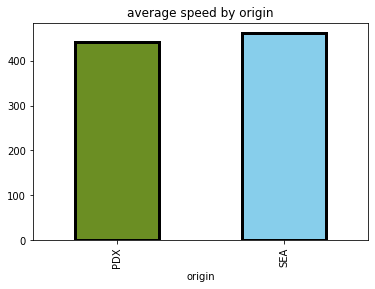

In [361]:
# Average speed by origin
pd_speed1 = speed1.toPandas()
pd_speed1.info()
pd_speed1.groupby('origin')['avg_speed'].mean().\
plot.bar(edgecolor="black", linewidth=3, color=['olivedrab', 'skyblue'],
         title="average speed by origin")
plt.show()

In [362]:
# Method 2: SQL-expression
speed2 = \
flights2.selectExpr("origin", "dest", "tailnum", "distance/(air_time/60) \
                    as avg_speed")

print(speed2.show(5))

+------+----+-------+------------------+
|origin|dest|tailnum|         avg_speed|
+------+----+-------+------------------+
|   SEA| LAX| N846VA| 433.6363636363636|
|   SEA| HNL| N559AS| 446.1666666666667|
|   SEA| SFO| N847VA|367.02702702702703|
|   PDX| SJC| N360SW| 411.3253012048193|
|   SEA| BUR| N612AS| 442.6771653543307|
+------+----+-------+------------------+
only showing top 5 rows

None


#### Filter

In [363]:
# filters can be chained
# this way different filters are applied in one query

# Define first filter
filter1 = flights2.origin == "SEA"

# Define second filter
filter2 = flights2.dest == "PDX"

# Filter the data, first by filterA then by filterB
filters_chained = selected1_spark.filter(filter1).filter(filter2)

filters_chained.show(10)

+------+----+-------+
|origin|dest|carrier|
+------+----+-------+
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     AS|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
+------+----+-------+
only showing top 10 rows



In [364]:
# filter observations based on a condition
# orderBy orders in ascending order

print(planes2.filter(planes2.manufacturer=='BOMBARDIER INC').\
      select('manufacturer', 'type', 'engines').orderBy('engines').show(5))
print("")

print(flights2.filter(flights2.carrier=="VX").\
      select('carrier', 'flight').orderBy('flight').show(5))
print("")

print(airports2.filter(airports2.name=="Lansdowne Airport").\
      select('name', 'dst', 'faa').show(3))

+--------------+--------------------+-------+
|  manufacturer|                type|engines|
+--------------+--------------------+-------+
|BOMBARDIER INC|Fixed wing multi ...|      2|
|BOMBARDIER INC|Fixed wing multi ...|      2|
|BOMBARDIER INC|Fixed wing multi ...|      2|
|BOMBARDIER INC|Fixed wing multi ...|      2|
|BOMBARDIER INC|Fixed wing multi ...|      2|
+--------------+--------------------+-------+
only showing top 5 rows

None

+-------+------+
|carrier|flight|
+-------+------+
|     VX|    84|
|     VX|    84|
|     VX|    84|
|     VX|    84|
|     VX|    84|
+-------+------+
only showing top 5 rows

None

+-----------------+---+---+
|             name|dst|faa|
+-----------------+---+---+
|Lansdowne Airport|  A|04G|
+-----------------+---+---+

None


In [365]:
# print number of observations of the filtered df

pf = planes2.filter(planes2.manufacturer=='BOMBARDIER INC').\
                    select('manufacturer', 'type', 'engines')
print(pf.count())

ff = flights2.filter(flights2.carrier=="VX").select('carrier', 'flight')
print(ff.count())

af = airports2.filter(airports2.name=="Lansdowne Airport").\
     select('name', 'dst', 'faa')
print(af.count())

214
186
1


In [366]:
# combining filters

pf2 = planes2.filter((planes2.manufacturer=='BOMBARDIER INC') & (planes2.engine=='Turbo-fan'))
pf2.show(3)
print(pf2.count())
print(len(pf2.columns))

+-------+----+--------------------+--------------+-----------+-------+-----+-----+---------+
|tailnum|year|                type|  manufacturer|      model|engines|seats|speed|   engine|
+-------+----+--------------------+--------------+-----------+-------+-----+-----+---------+
| N161PQ|2008|Fixed wing multi ...|BOMBARDIER INC|CL-600-2D24|      2|   95|   NA|Turbo-fan|
| N162PQ|2008|Fixed wing multi ...|BOMBARDIER INC|CL-600-2D24|      2|   95|   NA|Turbo-fan|
| N170PQ|2008|Fixed wing multi ...|BOMBARDIER INC|CL-600-2D24|      2|   95|   NA|Turbo-fan|
+-------+----+--------------------+--------------+-----------+-------+-----+-----+---------+
only showing top 3 rows

214
9


In [367]:
ff2 = flights2.filter((flights2.carrier=="VX")&(flights2.dest=="HNL"))
ff2.show()
print(ff2.count())
print(len(ff2.columns))
# The carrier vl seems not to fly to HNL

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+

0
16


In [368]:
af2 = airports2.filter((airports2.name=="Lansdowne Airport")&(airports2.dst=='A'))
af2.show()
print(af2.count())
print(len(af2.select('name', 'dst', 'faa').columns))
# Only one Lansdowne Airport with dst A

+---+-----------------+----------+-----------+----+---+---+
|faa|             name|       lat|        lon| alt| tz|dst|
+---+-----------------+----------+-----------+----+---+---+
|04G|Lansdowne Airport|41.1304722|-80.6195833|1044| -5|  A|
+---+-----------------+----------+-----------+----+---+---+

1
3


### Transform Pyspark data frames into SQL-tables

and applying SQL queries.

In [369]:
# registerTempTable is deprecated since 2.0.0
planes2.createOrReplaceTempView('planes2tbl')
sqlContext.sql("select manufacturer, type, engines, tailnum, year from planes2tbl LIMIT 5").show()

+----------------+--------------------+-------+-------+----+
|    manufacturer|                type|engines|tailnum|year|
+----------------+--------------------+-------+-------+----+
|AIRBUS INDUSTRIE|Fixed wing multi ...|      2| N102UW|1998|
|AIRBUS INDUSTRIE|Fixed wing multi ...|      2| N103US|1999|
|AIRBUS INDUSTRIE|Fixed wing multi ...|      2| N104UW|1999|
|AIRBUS INDUSTRIE|Fixed wing multi ...|      2| N105UW|1999|
|AIRBUS INDUSTRIE|Fixed wing multi ...|      2| N107US|1999|
+----------------+--------------------+-------+-------+----+



In [370]:
sqlContext.sql("select year, count(manufacturer) , count(type) \
                           from planes2tbl group by year LIMIT 5").show()

+----+-------------------+-----------+
|year|count(manufacturer)|count(type)|
+----+-------------------+-----------+
|1998|                159|        159|
|1999|                167|        167|
|2000|                189|        189|
|1995|                 54|         54|
|1987|                 23|         23|
+----+-------------------+-----------+



In [371]:
flights2.createOrReplaceTempView('flights2_tbl')
f2_arrt = sqlContext.sql("select flight, arr_time, origin, dest, air_time \
                         from flights2_tbl where arr_time > 500 limit 10" )

f2_arrt.show()
print(f2_arrt.count())
print(len(f2_arrt.columns))

+------+--------+------+----+--------+
|flight|arr_time|origin|dest|air_time|
+------+--------+------+----+--------+
|  1780|     935|   SEA| LAX|     132|
|   851|    1505|   SEA| HNL|     360|
|   755|    1652|   SEA| SFO|     111|
|   344|    1839|   PDX| SJC|      83|
|   522|    1015|   SEA| BUR|     127|
|    48|    1352|   PDX| DEN|     121|
|  1520|    1041|   PDX| OAK|      90|
|   755|    1842|   SEA| SFO|      98|
|   490|    1508|   SEA| SAN|     135|
|    26|    2352|   SEA| ORD|     198|
+------+--------+------+----+--------+

10
5


+----+--------+------------+
|dest|mean_arr|mean_airtime|
+----+--------+------------+
| KOA|  1519.9|      349.52|
| LIH| 1465.81|      346.62|
| HNL| 1523.23|       338.0|
| OGG| 1558.79|       337.9|
| FLL| 1720.69|      317.17|
| MIA|  691.32|      308.37|
| MCO|  1574.1|      298.65|
| TPA| 1681.91|      293.64|
| BOS| 1365.86|      288.03|
| JFK| 1362.55|       282.8|
| PHL| 1495.84|      279.63|
| EWR| 1275.48|      278.28|
| BWI| 1805.15|      270.79|
| DCA| 1797.06|      269.06|
| IAD| 1483.71|      264.66|
+----+--------+------------+



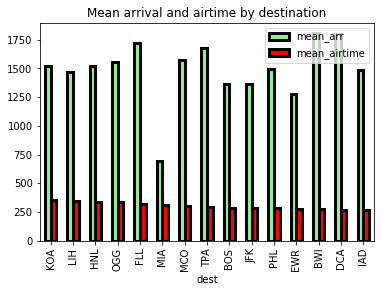

In [372]:
f2_gb = sqlContext.sql("select dest, round(avg(arr_time), 2) as mean_arr, \
                        round(avg(air_time), 2) as mean_airtime \
                        from flights2_tbl \
                        group by dest having mean_airtime > 50 \
                        order by mean_airtime desc limit 15")
f2_gb.show()
f2_gb.count()

pd_f2 = f2_gb.toPandas()
pd_f2.plot.bar(x='dest', title="Mean arrival and airtime by destination",
               edgecolor='black', linewidth=3, color=['lightgreen', 'red'])
plt.show()

In [373]:
f2_between = \
sqlContext.sql("select flight, arr_time, origin, dest, air_time, distance \
                from flights2_tbl \
                where distance between 200 and 600 order by distance desc")

f2_between.show(10)
f2_between.count()

+------+--------+------+----+--------+--------+
|flight|arr_time|origin|dest|air_time|distance|
+------+--------+------+----+--------+--------+
|  4877|    1834|   PDX| SJC|      95|     569|
|   404|    2133|   PDX| SJC|      82|     569|
|  2649|    1911|   PDX| SJC|      82|     569|
|   159|     843|   PDX| SJC|      77|     569|
|   404|    2135|   PDX| SJC|      85|     569|
|   406|     746|   PDX| SJC|      92|     569|
|   484|    1922|   PDX| SJC|      92|     569|
|  3129|    1219|   PDX| SJC|      89|     569|
|  1071|    1755|   PDX| SJC|      84|     569|
|  3252|    1415|   PDX| SJC|      87|     569|
+------+--------+------+----+--------+--------+
only showing top 10 rows



818

In [374]:
airports2.createOrReplaceTempView('airports2_tbl')
sqlContext.sql("select * from airports2_tbl").show(10)

+---+--------------------+----------+------------+----+---+---+
|faa|                name|       lat|         lon| alt| tz|dst|
+---+--------------------+----------+------------+----+---+---+
|04G|   Lansdowne Airport|41.1304722| -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|32.4605722| -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|41.9893408| -88.1012428| 801| -6|  A|
|06N|     Randall Airport| 41.431912| -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|31.0744722| -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|36.3712222| -82.1734167|1593| -4|  A|
|0G6|Williams County A...|41.4673056| -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|42.8835647| -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|39.7948244| -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|48.0538086|-122.8106436| 108| -8|  A|
+---+--------------------+----------+------------+----+---+---+
only showing top 10 rows



In [375]:
sqlContext.sql("select min(lat), max(lat) from airports2_tbl ").show()

+---------+---------+
| min(lat)| max(lat)|
+---------+---------+
|19.721375|72.270833|
+---------+---------+



In [376]:
sqlContext.sql("select * from airports2_tbl where name in ('Randall Airport')").show()

+---+---------------+---------+-----------+---+---+---+
|faa|           name|      lat|        lon|alt| tz|dst|
+---+---------------+---------+-----------+---+---+---+
|06N|Randall Airport|41.431912|-74.3915611|523| -5|  A|
+---+---------------+---------+-----------+---+---+---+



## Exchange data between Pyspark and Pandas

#### SQL-Table to pandas data frame

In [377]:
# transforming a sql Table into a pandas data frame
# then it can be used like any other df
# this helps when the query produces a result that can be processed locally on one machine

pandas_df_1 = f2_between.toPandas()

print(pandas_df_1.shape)
print(pandas_df_1.index)
print(pandas_df_1.columns.to_list())
print(pandas_df_1.info())
print(pandas_df_1.head(3))
print(pandas_df_1.tail(3))
print(pandas_df_1.describe())
print(pandas_df_1.isnull().sum())



(818, 6)
RangeIndex(start=0, stop=818, step=1)
['flight', 'arr_time', 'origin', 'dest', 'air_time', 'distance']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 6 columns):
flight      818 non-null int32
arr_time    810 non-null float64
origin      818 non-null object
dest        818 non-null object
air_time    808 non-null float64
distance    818 non-null int32
dtypes: float64(2), int32(2), object(2)
memory usage: 32.1+ KB
None
   flight  arr_time origin dest  air_time  distance
0     344    1839.0    PDX  SJC      83.0       569
1     159     843.0    PDX  SJC      77.0       569
2    2342    1338.0    PDX  SJC      77.0       569
     flight  arr_time origin dest  air_time  distance
815     684    1242.0    SEA  GEG      36.0       224
816     684    1241.0    SEA  GEG      39.0       224
817     698    2400.0    SEA  GEG      37.0       224
            flight     arr_time    air_time    distance
count   818.000000   810.000000  808.000000 

float64
float64
1338


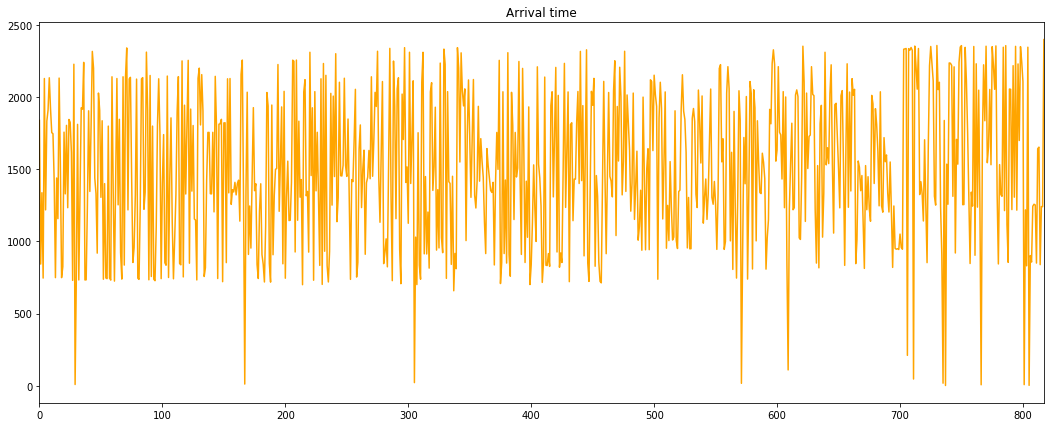

In [378]:
# plotting a variable arrival time
# this was difficult as NA values were included as literal NA strings

print(pandas_df_1["arr_time"].dtypes)
arr_time_pd = pandas_df_1["arr_time"].dropna()
print(arr_time_pd.dtype)

# check one value
print(int(arr_time_pd[2]))
oo = int(arr_time_pd[2])
float(oo)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # print(arr_time_pd)

# exclude all rows with NA   
# arr_time_pd_clean = arr_time_pd[arr_time_pd!='NA']

# first convert to string then int
# arr_time_pd_int = arr_time_pd_clean.astype(str).astype(int)

# The above code is not longer relevant


arr_time_pd.plot(figsize=(18, 7), color="orange", title="Arrival time")
plt.show()



#### Pandas data frame to a data frame in a Spark cluster

   Randomvar1  Randomvar2  Randomvar3
0    0.906770    0.006951    0.013062
1    0.840453    0.486592    0.286390
2    0.115921    0.288939    0.656940
3    0.734695    0.585788    0.584688
4    0.109211    0.979261    0.156809


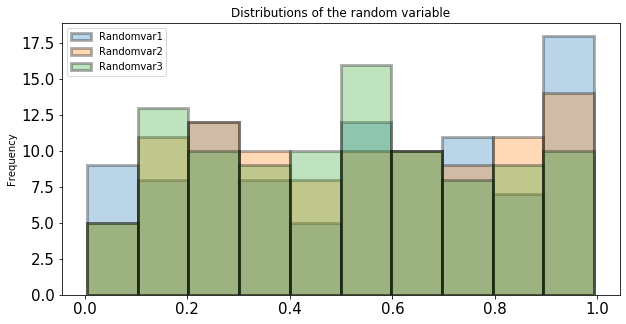

In [379]:
# Creating a data frame based on random numbers
random_dict = {"Randomvar1": np.random.random(100), 
               "Randomvar2": np.random.random(100), 
               "Randomvar3": np.random.random(100)}

random_df = pd.DataFrame(random_dict)

print(random_df.head())

# make a plot just for fun
random_df.plot.hist(figsize=(10,5), alpha=0.3, fontsize=15, 
                  title="Distributions of the random variable",
                  edgecolor='black', linewidth=3)
plt.show()

In [380]:
# create df from pandas df
spark_df = spark.createDataFrame(random_df)
print(spark_df.head(2))
# spark df methods work but the df is not part of the cluster
# therefore method of the SQL-context for example does not work

print("")

# This dataframe is only stored locally but not as a table in the spark catalog
print(spark.catalog.listTables())

[Row(Randomvar1=0.9067695998224712, Randomvar2=0.006951451797322594, Randomvar3=0.013062103483643006), Row(Randomvar1=0.8404530395671246, Randomvar2=0.4865922016407819, Randomvar3=0.2863902679521362)]

[Table(name='airports2_tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='df_airports', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='df_flights', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='flights2_tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='planes2tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='planes_csv', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp_df_198', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [381]:
spark_df.createOrReplaceTempView("temp_df_198")

print(spark.catalog.listTables())

# 'temp_df_198' is added to the catalog
# sql methods can be applied

[Table(name='airports2_tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='df_airports', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='df_flights', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='flights2_tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='planes2tbl', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='planes_csv', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp_df_198', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


### Statistics & aggregations (groupby)

#### Flights

In [382]:
print(flights2.columns)
print(flights2.printSchema())
print(flights2.show(2))

['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']
root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- dep_time: integer (nullable = true)
 |-- dep_delay: integer (nullable = true)
 |-- arr_time: integer (nullable = true)
 |-- arr_delay: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: integer (nullable = true)
 |-- distance: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- minute: integer (nullable = true)

None
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight

In [383]:
# average air time of flights2
flights2.select(flights2.air_time).agg(avg(col("air_time")).\
                                       alias('average_airtime')) .show()



+------------------+
|   average_airtime|
+------------------+
|152.88423173803525|
+------------------+



In [384]:
distance_stats = \
flights2.select(mean(col('distance')).alias('mean'),
                stddev(col('distance')).alias('std')).collect()

mean_dist = distance_stats[0]['mean']
std_dist = distance_stats[0]['std']

print(mean_dist)
print(std_dist)

1208.1516
656.8599023464376


In [385]:
# Distinct destinations
# SQL
query_166 = "FROM df_flights SELECT DISTINCT(dest)"
dest_166 = spark.sql(query_166)
print(dest_166.show())
print(dest_166.count())

print("")

# pyspark
pydest = flights2.select('dest').distinct()
print(pydest.show())
print(pydest.count())

+----+
|dest|
+----+
| MSY|
| GEG|
| BUR|
| SNA|
| EUG|
| OAK|
| DCA|
| RDM|
| KTN|
| LIH|
| IAH|
| HNL|
| SJC|
| CVG|
| AUS|
| LGB|
| RNO|
| BOS|
| EWR|
| LAS|
+----+
only showing top 20 rows

None
69

+----+
|dest|
+----+
| LAX|
| HNL|
| SFO|
| SJC|
| BUR|
| DEN|
| OAK|
| SAN|
| ORD|
| PHX|
| LAS|
| ANC|
| SMF|
| MDW|
| BOS|
| PHL|
| RNO|
| FAT|
| OGG|
| LGB|
+----+
only showing top 20 rows

None
69


In [386]:
flights2.filter(flights2.dest == 'OAK').groupby().avg('dep_delay').show()
flights2.filter(flights2.dest == 'OAK').groupby().agg(stddev('dep_delay').alias("standard deviation")).show()

print("")

flights2.filter(flights2.dest == 'HNL').groupby().avg('dep_delay').show()
flights2.filter(flights2.dest == 'HNL').groupby().\
agg(stddev('dep_delay').alias("standard deviation")).show()

# departure delay OAK is on average higher than HNL

+-----------------+
|   avg(dep_delay)|
+-----------------+
|9.735735735735735|
+-----------------+

+------------------+
|standard deviation|
+------------------+
|21.065070210329193|
+------------------+


+------------------+
|    avg(dep_delay)|
+------------------+
|1.5244755244755244|
+------------------+

+------------------+
|standard deviation|
+------------------+
|16.116578887589313|
+------------------+



In [387]:
# origins?
flights2.select('origin').distinct().show()

# flight with shortest distance left from PDX
flights2.filter(flights2.origin=='PDX').groupby().min('distance').show()

# flight with maximal airtime starting in SEA
flights2.filter(flights2.origin=='SEA').groupby().max('air_time').show()

+------+
|origin|
+------+
|   SEA|
|   PDX|
+------+

+-------------+
|min(distance)|
+-------------+
|          106|
+-------------+

+-------------+
|max(air_time)|
+-------------+
|          409|
+-------------+



In [388]:
# column names of the plane table
print(planes2.columns)
print("")
# Minimum number of seats of any plane
print(planes2.groupBy().min('seats').show())
# Maximum number of seats of any plane
print(planes2.groupBy().max('seats').show())

['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine']

+----------+
|min(seats)|
+----------+
|         2|
+----------+

None
+----------+
|max(seats)|
+----------+
|       450|
+----------+

None


In [389]:
# What is the average airtime of the carrier Delta flights
# starting from SEA?
flights2.filter(flights2.carrier=='DL').\
filter(flights2.origin=='SEA').groupBy().avg('air_time').show()

# Total air time in hoursTotal hours 
flights2.withColumn("duration_hrs", flights2.air_time/60).\
groupBy().sum('duration_hrs').show()

+------------------+
|     avg(air_time)|
+------------------+
|188.20689655172413|
+------------------+

+------------------+
| sum(duration_hrs)|
+------------------+
|25289.600000000126|
+------------------+



In [390]:
# count of tailnum

tailnum_188 = flights2.groupBy("tailnum").count().\
orderBy('count', ascending=False)
print(tailnum_188.show())

tailnum_188_pd = tailnum_188.toPandas()

print(tailnum_188_pd .dtypes)
print(isinstance(tailnum_188_pd, pd.DataFrame))
print(tailnum_188_pd.shape)
print(tailnum_188_pd.columns)
print(tailnum_188_pd.head())



+-------+-----+
|tailnum|count|
+-------+-----+
| N612AS|   51|
| N224AG|   50|
| N219AG|   50|
| N218AG|   49|
| N223AG|   49|
| N611AS|   46|
| N225AG|   45|
| N607AS|   45|
| N615AS|   45|
| N435AS|   45|
| N794AS|   42|
| N216AG|   41|
| N644AS|   41|
| N627AS|   41|
| N215AG|   41|
| N622AS|   40|
| N626AS|   40|
| N619AS|   40|
| N227AG|   40|
| N413AS|   40|
+-------+-----+
only showing top 20 rows

None
tailnum    object
count       int64
dtype: object
True
(2252, 2)
Index(['tailnum', 'count'], dtype='object')
  tailnum  count
0  N612AS     51
1  N219AG     50
2  N224AG     50
3  N218AG     49
4  N223AG     49


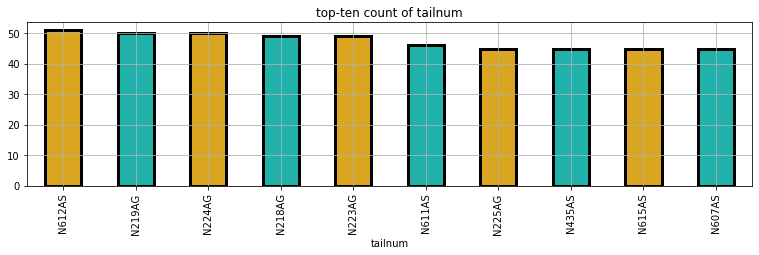

In [391]:
# # top-ten count of tailnum
tailnum_188_pd[:10].plot.bar(x='tailnum', y='count', edgecolor='black',
                             linewidth=3, 
                             color=['goldenrod', 'lightseagreen'],
                             legend=False, figsize=(13,3),
                             title="top-ten count of tailnum",
                             grid=True)
plt.show()

In [392]:
# Group by tailnum
by_plane = flights2.groupBy("tailnum")

# Number of flights each plane made
by_plane.count().show()

+-------+-----+
|tailnum|count|
+-------+-----+
| N846VA|    6|
| N559AS|   20|
| N847VA|    5|
| N360SW|    4|
| N612AS|   51|
| N646SW|    3|
| N422WN|    4|
| N361VA|    5|
| N309AS|   27|
| N564AS|   24|
| N323AS|   31|
| N305AS|   27|
| N433AS|   39|
| N765AS|   12|
| N713AS|   31|
| N27205|    2|
| N626AS|   40|
| N8634A|    1|
| N597AS|   29|
| N215AG|   41|
+-------+-----+
only showing top 20 rows



In [393]:

# Group by origin
by_origin = flights2.groupBy("origin")

# Average duration of flights from PDX and SEA
by_origin.avg("air_time").show()

+------+------------------+
|origin|     avg(air_time)|
+------+------------------+
|   SEA| 160.4361496051259|
|   PDX|137.11543248288737|
+------+------------------+



In [394]:
# Group by month and dest
by_month_dest = flights2.groupBy('month' , 'dest')

# Average departure delay by month and destination
by_month_dest_avg = by_month_dest.avg('dep_delay')
print(by_month_dest_avg.show())


# Standard deviation of departure delay
by_month_dest.agg(F.stddev('dep_delay')).show()


+-----+----+-------------------+
|month|dest|     avg(dep_delay)|
+-----+----+-------------------+
|   12| LAX| 2.4827586206896552|
|    1| HNL|               -5.1|
|    3| SFO|  6.048387096774194|
|    4| SJC|               7.28|
|    3| BUR| 3.0588235294117645|
|    1| DEN|  20.55263157894737|
|    7| OAK|  9.807692307692308|
|    5| SFO| 11.205479452054794|
|    4| SAN| 0.2777777777777778|
|   11| ORD|  5.956521739130435|
|   11| LAX|  5.076923076923077|
|    8| PHX| 1.5454545454545454|
|   10| LAS|0.23809523809523808|
|   11| ANC|  7.529411764705882|
|   10| SFO|  9.303030303030303|
|    1| SFO|               6.56|
|   12| SMF|               17.0|
|    8| MDW|               7.45|
|    1| BOS|             11.625|
|    6| BUR| -6.333333333333333|
+-----+----+-------------------+
only showing top 20 rows

None
+-----+----+----------------------+
|month|dest|stddev_samp(dep_delay)|
+-----+----+----------------------+
|   12| LAX|     11.35033256169544|
|    1| HNL|     4.55704582670249

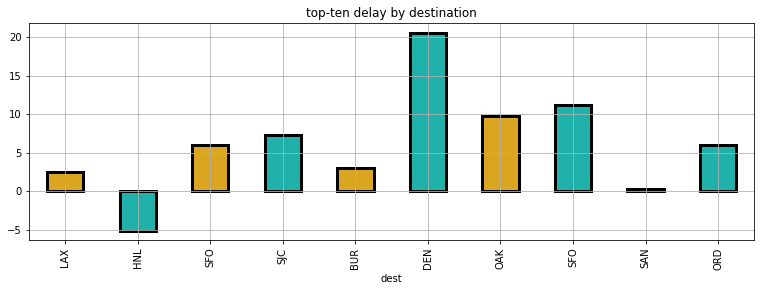

In [395]:
dest_199 =  by_month_dest_avg.toPandas()
dest_199[:10].plot.bar(x='dest', y='avg(dep_delay)', grid=True,
                       edgecolor='black',
                       linewidth=3, 
                       color=['goldenrod', 'lightseagreen'],
                       legend=False, figsize=(13,4),
                       title="top-ten delay by destination")
plt.show()

#### Planes

In [396]:
print(df_planes.columns)
print(df_planes.select('speed').show(10))

['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine']
+-----+
|speed|
+-----+
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
+-----+
only showing top 10 rows

None


In [397]:
print(planes2.columns)
print(planes2.printSchema())
print(planes2.show(2))



['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine']
root
 |-- tailnum: string (nullable = true)
 |-- year: string (nullable = true)
 |-- type: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- engines: integer (nullable = true)
 |-- seats: integer (nullable = true)
 |-- speed: string (nullable = true)
 |-- engine: string (nullable = true)

None
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+


+---------+-----+
|    model|seats|
+---------+-----+
|  747-451|  450|
|777-232LR|  442|
|  777-224|  400|
|  777-224|  400|
| A321-231|  379|
+---------+-----+
only showing top 5 rows



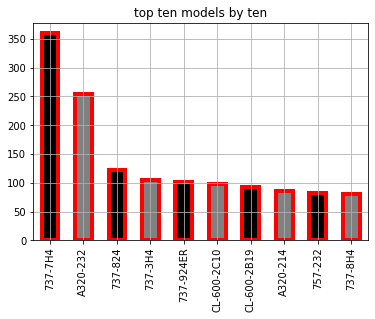

In [398]:
seats_55 = \
planes2.select(['model', 'seats']).orderBy('seats', ascending=False)
seats_55.show(5)

seats_55_pd = seats_55.toPandas()

seats_55_pd.model.value_counts()[:10]

seats_55_pd.model.value_counts()[:10].\
plot.bar(legend=False, title="top ten models by ten", edgecolor='red',
         linewidth=4, color=['black', "gray"], grid=True)
plt.show()

### Nan & Null values

as shown in the SQL section speed of planes consists mostly of Null values. This is replicated now with pyspark.

In [399]:
planes2.select('speed').show(5)

+-----+
|speed|
+-----+
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
+-----+
only showing top 5 rows



In [400]:
# convert some variables to integer

planes_cols = \
['year',  'seats', 'speed']


for i in planes_cols:
    planes3 = planes2.withColumn(i, planes2[i].cast(IntegerType()))

In [401]:
# null values?
null_1 = planes3.select('speed').where(col("speed").isNull())

print(null_1.show(3))
print(planes2.select('speed').show())
print(null_1.count())
print(planes2.count())


+-----+
|speed|
+-----+
| null|
| null|
| null|
+-----+
only showing top 3 rows

None
+-----+
|speed|
+-----+
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
|   NA|
+-----+
only showing top 20 rows

None
2622
2628


In [402]:
# check for nan-values
# https://stackoverflow.com/questions/43882699/differences-between-null-and-nan-in-spark-how-to-deal-with-it/43883025

nan_1 = planes2.where(isnan(col("speed")))
nan_1.show()
nan_1.count()

+-------+----+----+------------+-----+-------+-----+-----+------+
|tailnum|year|type|manufacturer|model|engines|seats|speed|engine|
+-------+----+----+------------+-----+-------+-----+-----+------+
+-------+----+----+------------+-----+-------+-----+-----+------+



0

Dropping Null values results in ony 6 observations.

In [403]:
# df.na.drop(subset=["dt_mvmt"])
# https://stackoverflow.com/questions/37262762/filter-pyspark-dataframe-column-with-none-value

planes4 = planes3.na.drop(subset=["speed"])

print(planes4.count())
print(len(planes4.columns))


6
9


In [404]:
# What engines types are there?
planes3.select('engine').distinct().show()

+-------------+
|       engine|
+-------------+
|    Turbo-fan|
|    Turbo-jet|
|Reciprocating|
|   Turbo-prop|
|  Turbo-shaft|
|      4 Cycle|
+-------------+



In [405]:
planes3.select('engine').distinct().show()

+-------------+
|       engine|
+-------------+
|    Turbo-fan|
|    Turbo-jet|
|Reciprocating|
|   Turbo-prop|
|  Turbo-shaft|
|      4 Cycle|
+-------------+



In [406]:
# group_data.agg({'Sales':'max'}).show()
planes3.groupby('engine').agg({'speed':'avg'}).show()

+-------------+----------+
|       engine|avg(speed)|
+-------------+----------+
|    Turbo-fan|      null|
|    Turbo-jet|      null|
|Reciprocating|    103.25|
|   Turbo-prop|      null|
|  Turbo-shaft|     112.0|
|      4 Cycle|     108.0|
+-------------+----------+



In [407]:
# group by engines = number of engines
planes3.select('engines').distinct().show()

+-------+
|engines|
+-------+
|      2|
|      1|
|      4|
|      3|
+-------+



In [408]:
# group by engines = number of engines
engine_34 = planes3.groupby('engine')

engine_34.max('engines').show()

+-------------+------------+
|       engine|max(engines)|
+-------------+------------+
|    Turbo-fan|           3|
|    Turbo-jet|           4|
|Reciprocating|           2|
|   Turbo-prop|           2|
|  Turbo-shaft|           2|
|      4 Cycle|           1|
+-------------+------------+



In [409]:
engine_34.agg(F.max(planes3.engines).alias('maximum'),
              F.min(planes3.engines).alias('minimum'),
              round(F.mean(planes3.engines),2).alias('mean'),
              round(F.stddev(planes3.engines),2).alias('mean')).show()

+-------------+-------+-------+----+----+
|       engine|maximum|minimum|mean|mean|
+-------------+-------+-------+----+----+
|    Turbo-fan|      3|      2| 2.0|0.07|
|    Turbo-jet|      4|      2| 2.0|0.09|
|Reciprocating|      2|      1| 1.1|0.32|
|   Turbo-prop|      2|      2| 2.0| 0.0|
|  Turbo-shaft|      2|      1|1.33|0.58|
|      4 Cycle|      1|      1| 1.0| NaN|
+-------------+-------+-------+----+----+



### Joining

<p>
needs a (primary) key variable in one table and another (secondary) key
variable in the joining table. Keys are variables with values shared by both tables, while the name of the variables can differ. It depends on how (left join, right join ...) the tables are joined, which table is seen as the joining table.
</p> 


#### Join flights with airport

In [410]:
# Joining the flight and the airport tables.
# Which tables can be used as keys?

print(airports2.columns)
print("")
print(flights2.columns)

['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst']

['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']


In [411]:
# Are faa and dest candidates for keys?

print(airports2.show(2))

print(flights2.select('dest').show(2))

+---+--------------------+----------+-----------+----+---+---+
|faa|                name|       lat|        lon| alt| tz|dst|
+---+--------------------+----------+-----------+----+---+---+
|04G|   Lansdowne Airport|41.1304722|-80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|32.4605722|-85.6800278| 264| -5|  A|
+---+--------------------+----------+-----------+----+---+---+
only showing top 2 rows

None
+----+
|dest|
+----+
| LAX|
| HNL|
+----+
only showing top 2 rows

None


In [412]:
print(airports2.select('faa').distinct().show(5))

dest_1265 = flights2.select('dest').distinct()
print(dest_1265.count())
dest_6000 = airports2.select('faa').distinct()
print(dest_6000.count())

# It seems the aiport table includes more airports than
# destinations in the flight table

+---+
|faa|
+---+
|04G|
|06A|
|06C|
|06N|
|09J|
+---+
only showing top 5 rows

None
69
1396


In [413]:
airports2.filter(airports2.faa=='LAX').show()
flights2.select(['dest', 'origin']).filter(flights2.dest=='LAX').show(3)

+---+----------------+---------+-----------+---+---+---+
|faa|            name|      lat|        lon|alt| tz|dst|
+---+----------------+---------+-----------+---+---+---+
|LAX|Los Angeles Intl|33.942536|-118.408075|126| -8|  A|
+---+----------------+---------+-----------+---+---+---+

+----+------+
|dest|origin|
+----+------+
| LAX|   SEA|
| LAX|   SEA|
| LAX|   SEA|
+----+------+
only showing top 3 rows



In [414]:
airports2.filter(airports2.faa=='PDX').show()
flights2.select(['dest', 'origin']).filter(flights2.dest=='PDX').show(3)


+---+-------------+---------+---------+---+---+---+
|faa|         name|      lat|      lon|alt| tz|dst|
+---+-------------+---------+---------+---+---+---+
|PDX|Portland Intl|45.588722|-122.5975| 30| -8|  A|
+---+-------------+---------+---------+---+---+---+

+----+------+
|dest|origin|
+----+------+
| PDX|   SEA|
| PDX|   SEA|
| PDX|   SEA|
+----+------+
only showing top 3 rows



In [415]:
airports3 = airports2.withColumnRenamed('faa' , 'dest')
# faa = old name, dest = new name
print(airports3.columns)

['dest', 'name', 'lat', 'lon', 'alt', 'tz', 'dst']


In [416]:
join_flair = flights2.join(airports3, on="dest", how='leftouter')
# left table = flights2, right table = aiports3

print(len(flights2.columns))
print(len(airports3.columns))
print(len(join_flair.columns))
print(16+7-1)

join_flair.\
select('name', 'lat', 'lon', 'dest', 'air_time', 'carrier').show(10)

# check: 
# name Los Angeles Intl correct with LAX
# name San Francisco Intl correct with SFO

16
7
22
22
+--------------------+---------+-----------+----+--------+-------+
|                name|      lat|        lon|dest|air_time|carrier|
+--------------------+---------+-----------+----+--------+-------+
|    Los Angeles Intl|33.942536|-118.408075| LAX|     132|     VX|
|       Honolulu Intl|21.318681|-157.922428| HNL|     360|     AS|
|  San Francisco Intl|37.618972|-122.374889| SFO|     111|     VX|
|Norman Y Mineta S...|  37.3626|-121.929022| SJC|      83|     WN|
|            Bob Hope|34.200667|-118.358667| BUR|     127|     AS|
|         Denver Intl|39.861656|-104.673178| DEN|     121|     WN|
|Metropolitan Oakl...|37.721278|-122.220722| OAK|      90|     WN|
|  San Francisco Intl|37.618972|-122.374889| SFO|      98|     VX|
|      San Diego Intl|32.733556|-117.189667| SAN|     135|     AS|
|  Chicago Ohare Intl|41.978603| -87.904842| ORD|     198|     AS|
+--------------------+---------+-----------+----+--------+-------+
only showing top 10 rows



#### Joining planes with flights

In [417]:
print(planes2.columns)
print(flights2.columns)
# This seems easy: tailnum

['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine']
['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']


In [418]:
join_flair = flights2.join(airports3, on="dest", how='leftouter')
# left table = flights2, right table = aiports3


In [419]:
join_plf = planes2.join(flights2, on="tailnum", how='rightouter')

print(join_plf.columns)
print(len(join_plf.columns))
print(len(planes2.columns))
print(len(flights2.columns))
print(16+9-1)

['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine', 'year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']
24
9
16
24


In [420]:
join_plf.\
select('tailnum', 'manufacturer', 'model', 
       'carrier', 'flight', 'distance').show(10)

+-------+------------+--------+-------+------+--------+
|tailnum|manufacturer|   model|carrier|flight|distance|
+-------+------------+--------+-------+------+--------+
| N846VA|      AIRBUS|A320-214|     VX|  1780|     954|
| N559AS|      BOEING| 737-890|     AS|   851|    2677|
| N847VA|      AIRBUS|A320-214|     VX|   755|     679|
| N360SW|      BOEING| 737-3H4|     WN|   344|     569|
| N612AS|      BOEING| 737-790|     AS|   522|     937|
| N646SW|      BOEING| 737-3H4|     WN|    48|     991|
| N422WN|      BOEING| 737-7H4|     WN|  1520|     543|
| N361VA|      AIRBUS|A320-214|     VX|   755|     679|
| N309AS|      BOEING| 737-990|     AS|   490|    1050|
| N564AS|      BOEING| 737-890|     AS|    26|    1721|
+-------+------------+--------+-------+------+--------+
only showing top 10 rows



+--------------------+-------------+
|        manufacturer|mean_distance|
+--------------------+-------------+
|              AIRBUS|    1375.0629|
|              BOEING|     1245.056|
|      BOMBARDIER INC|     749.3497|
|    AIRBUS INDUSTRIE|    1318.1736|
|             EMBRAER|      127.293|
|                BELL|       1616.0|
|   MCDONNELL DOUGLAS|    1554.7872|
|            CANADAIR|       731.25|
|ROBINSON HELICOPT...|     925.3333|
|       BARKER JACK L|        965.0|
|  CIRRUS DESIGN CORP|       1693.5|
|              CESSNA|       1616.0|
|                null|     1621.942|
+--------------------+-------------+



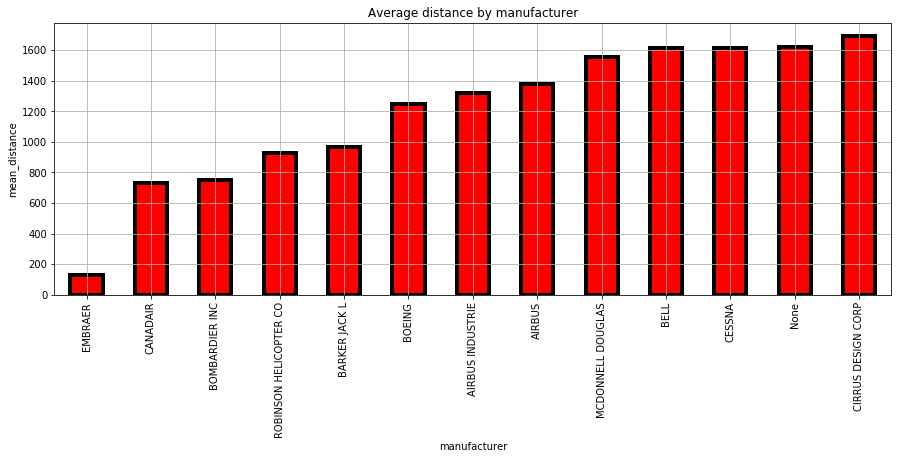

In [421]:
dist_4999 = \
join_plf.groupby('manufacturer').agg(round(F.mean('distance'),4).alias("mean_distance"))

dist_4999.show()

dist_4999_pd = dist_4999.toPandas()

dist_4999_pd.sort_values(by='mean_distance')\
.plot.bar(x='manufacturer', edgecolor="black",
          linewidth=4, 
          legend=False, 
          title="Average distance by manufacturer",
          grid=True, figsize=(15,5),
          color='red')
plt.ylabel('mean_distance')
plt.show()